# Driving Behavior
### Carlos Javier Leal Beltran A01741355
### Carlos Moises Chavez Jimenez A01637322
### Ernesto Adrian Alvarez Salazar A00227490
### Luis Armando Salazar Lopez A0114901


In [ ]:
# Importando las librerías
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Tratamiento y Muestreo Inicial de los Datos

In [ ]:
# Importando los datos
t_test=pd.read_csv('/content/drive/Shareddrives/Concentracion - IA para Ciencia de Datos/Reto/Dataset Driving/test_motion_data.csv')
t_train=pd.read_csv('/content/drive/Shareddrives/Concentracion - IA para Ciencia de Datos/Reto/Dataset Driving/train_motion_data.csv')

In [ ]:
# Imprimimos los datos obtenidos del csv de prueba
t_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,SLOW,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,SLOW,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,SLOW,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,SLOW,820708


In [ ]:
# Imprimimos los datos obtenidos del csv de entrenamiento
t_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [ ]:
# Veremos también la cantidad de registros y variables que tenemos disponibles
Nrows = t_train.shape[0]
Ncols = t_train.shape[1]

print("Number of persons (rows)  = {0:0d}".format(Nrows))
print("Number of variables(columns)   = {0:0d}".format(Ncols))

Number of persons (rows)  = 3644
Number of variables(columns)   = 8


In [ ]:
# Haremos un resúmen a grandes rasgos de la información disponible
t_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [ ]:
# Normalizamos los datos de Timestamp, los hacemos comenzar en 0
t_train['Timestamp'] = t_train['Timestamp'] - t_train['Timestamp'].min()
#quitamos los registros duplicados del mismo segundo
t_train['Timestamp'] = [2*t_train['Timestamp'][i]+((i+1)%2) for i in range(len(t_train))]
t_train['Timestamp']


0          1
1          2
2          3
3          4
4          5
        ... 
3639    4320
3640    4323
3641    4322
3642    4325
3643    4324
Name: Timestamp, Length: 3644, dtype: int64

In [ ]:
# Ordenamos los datos en segun el tiempo en el que sucedieron
t_train = t_train.sort_values(by=['Timestamp'])
t_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,2156.019759
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,1284.295759
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,1.000000
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,983.750000
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,2145.500000
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3283.250000
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,4325.000000


In [ ]:
# Mostraremos el tipo de dato de cada variable de la bd
t_train.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Class         object
Timestamp      int64
dtype: object

In [ ]:
# Función para revisar que el dataset de training no tenga datos faltantes
pd.isna(t_train).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
# Función para revisar que el dataset de testing no tenga datos faltantes
pd.isna(t_test).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

A partir de este punto comenzamos a hacer graficas para representar los datos, hemos de notar que para las siguientes que esten separadas por grupo se tienen los siguentes codigos de color

- `Agresivo ->    Rojo`
- `Normal   ->    Verde`
- `Lento    ->    Azul`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


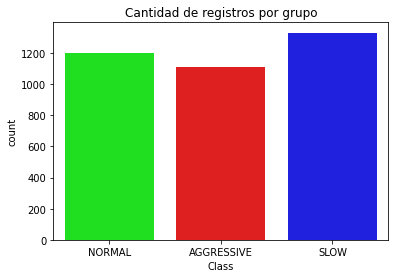

In [ ]:
# Graficamos para ver cuantos datos de cada grupo hay
import seaborn as sns
sns.countplot('Class',data = t_train, palette=["#0f0", "#f00", "#00f"]).set(title='Cantidad de registros por grupo')
plt.show()

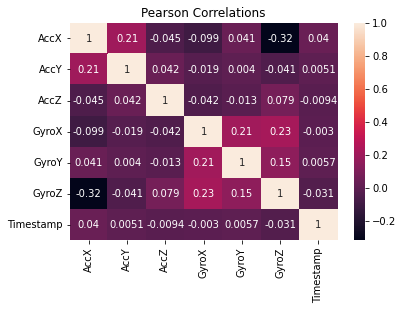

In [ ]:
# Calcularemos la correlación entre las variables
ax = sns.heatmap(t_train.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
# Clasificaremos nuestras variables conforme al tipo de conductor
t_trainSlow = t_train[t_train['Class']=='SLOW']
t_trainNormal = t_train[t_train['Class']=='NORMAL']
t_trainAggressive = t_train[t_train['Class']=='AGGRESSIVE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


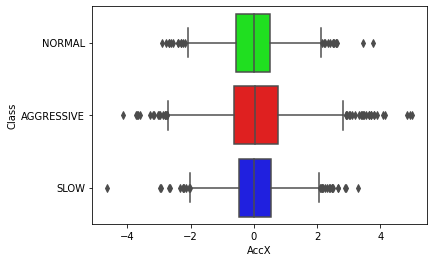

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en AccX
plot = sns.boxplot(t_train['AccX'],y=t_train['Class'], palette=["#0f0", "#f00", "#00f"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


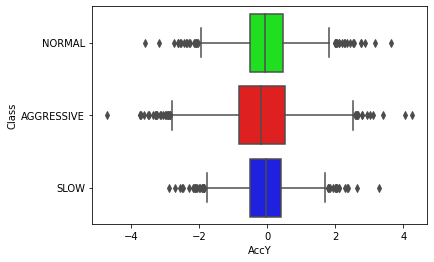

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en AccY
plot = sns.boxplot(t_train['AccY'],y=t_train['Class'], palette=["#0f0", "#f00", "#00f"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


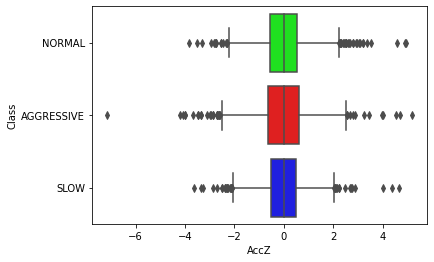

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en AccZ
plot = sns.boxplot(t_train['AccZ'],y=t_train['Class'], palette=["#0f0", "#f00", "#00f"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


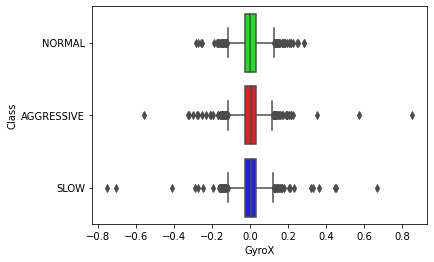

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en GyroX
plot = sns.boxplot(t_train['GyroX'],y=t_train['Class'], palette=["#0f0", "#f00", "#00f"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


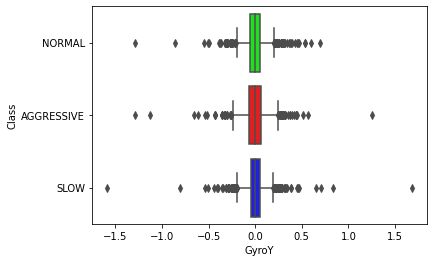

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en GyroY
plot = sns.boxplot(t_train['GyroY'],y=t_train['Class'], palette=["#0f0", "#f00", "#00f"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


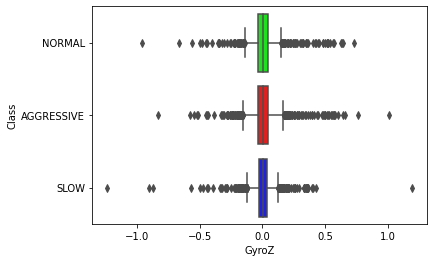

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en GyroZ
plot = sns.boxplot(t_train['GyroZ'],y=t_train['Class'], palette=["#0f0", "#f00", "#00f"])

En el caso de nuestra base de datos para training, no tenemos datos nulos ni que parezcan ser erroneos. Tenemos varios datos que se consideran outliers al revisar los boxplots por clases, estos datos no se eliminaran debido a la naturaleza del problema.

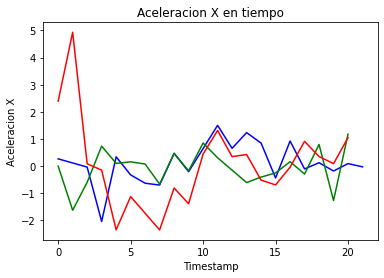

In [ ]:
# graficamos los primeros 20 elementos de cada grupo segun AccX
plt.title('Aceleracion X en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Aceleracion X')
tS = t_trainSlow['Timestamp'][:20]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:20]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:20]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, t_trainSlow['AccX'][:20], color='blue')
plt.plot(tN, t_trainNormal['AccX'][:20], color='green')
plt.plot(tA, t_trainAggressive['AccX'][:20], color='red')

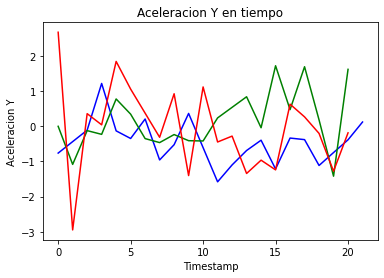

In [ ]:
# graficamos los primeros 20 elementos de cada grupo segun AccY
plt.title('Aceleracion Y en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Aceleracion Y')
tS = t_trainSlow['Timestamp'][:20]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:20]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:20]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, t_trainSlow['AccY'][:20], color='blue')
plt.plot(tN, t_trainNormal['AccY'][:20], color='green')
plt.plot(tA, t_trainAggressive['AccY'][:20], color='red')

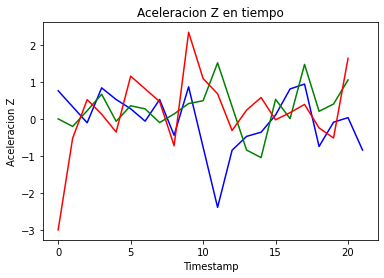

In [ ]:
# graficamos los primeros 20 elementos de cada grupo segun AccZ
plt.title('Aceleracion Z en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Aceleracion Z')
tS = t_trainSlow['Timestamp'][:20]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:20]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:20]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, t_trainSlow['AccZ'][:20], color='blue')
plt.plot(tN, t_trainNormal['AccZ'][:20], color='green')
plt.plot(tA, t_trainAggressive['AccZ'][:20], color='red')

In [ ]:
# Calculamos la magnitud de aceleracion para cada grupo, por registro
Aacc = np.sqrt(t_trainAggressive['AccX']**2+t_trainAggressive['AccY']**2+t_trainAggressive['AccZ']**2)
Nacc = np.sqrt(t_trainNormal['AccX']**2+t_trainNormal['AccY']**2+t_trainNormal['AccZ']**2)
Sacc = np.sqrt(t_trainSlow['AccX']**2+t_trainSlow['AccY']**2+t_trainSlow['AccZ']**2)

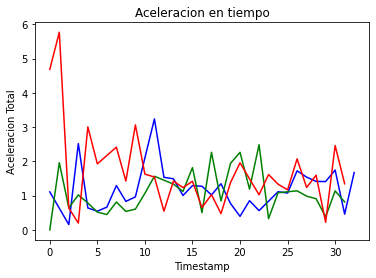

In [ ]:
# graficamos los primeros 30 elementos de cada grupo segun la magnitud total de la aceleracion
plt.title('Aceleracion en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Aceleracion Total')
tS = t_trainSlow['Timestamp'][:30]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:30]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:30]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, Sacc[:30], color='blue')
plt.plot(tN, Nacc[:30], color='green')
plt.plot(tA, Aacc[:30], color='red')

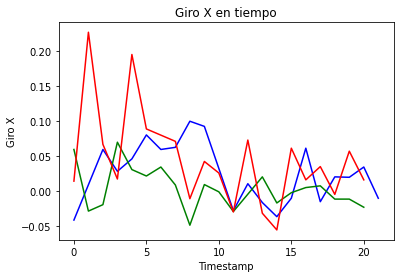

In [ ]:
# graficamos los primeros 20 elementos de cada grupo segun GyroX
plt.title('Giro X en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Giro X')
tS = t_trainSlow['Timestamp'][:20]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:20]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:20]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, t_trainSlow['GyroX'][:20], color='blue')
plt.plot(tN, t_trainNormal['GyroX'][:20], color='green')
plt.plot(tA, t_trainAggressive['GyroX'][:20], color='red')

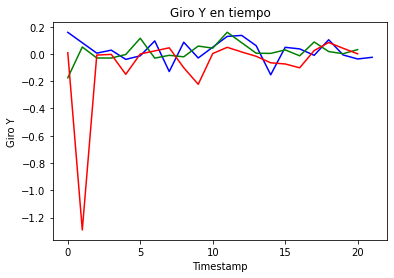

In [ ]:
# graficamos los primeros 20 elementos de cada grupo segun GyroY
plt.title('Giro Y en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Giro Y')
tS = t_trainSlow['Timestamp'][:20]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:20]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:20]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, t_trainSlow['GyroY'][:20], color='blue')
plt.plot(tN, t_trainNormal['GyroY'][:20], color='green')
plt.plot(tA, t_trainAggressive['GyroY'][:20], color='red')

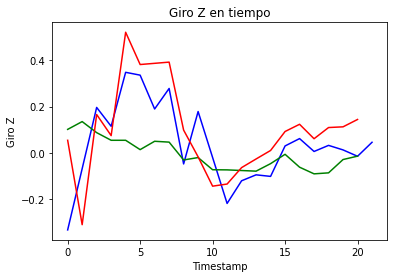

In [ ]:
# graficamos los primeros 20 elementos de cada grupo segun GyroZ
plt.title('Giro Z en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Giro Z')
tS = t_trainSlow['Timestamp'][:20]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:20]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:20]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, t_trainSlow['GyroZ'][:20], color='blue')
plt.plot(tN, t_trainNormal['GyroZ'][:20], color='green')
plt.plot(tA, t_trainAggressive['GyroZ'][:20], color='red')

In [ ]:
# Calculamos la magnitud de giro para cada grupo, por registro
Agcc = np.sqrt(t_trainAggressive['GyroX']**2+t_trainAggressive['GyroY']**2+t_trainAggressive['GyroZ']**2)
Ngcc = np.sqrt(t_trainNormal['GyroX']**2+t_trainNormal['GyroY']**2+t_trainNormal['GyroZ']**2)
Sgcc = np.sqrt(t_trainSlow['GyroX']**2+t_trainSlow['GyroY']**2+t_trainSlow['GyroZ']**2)

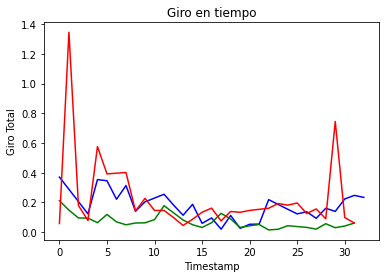

In [ ]:
# graficamos los primeros 30 elementos de cada grupo segun la magnitud total del giro
plt.title('Giro en tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Giro Total')
tS = t_trainSlow['Timestamp'][:30]-t_trainSlow['Timestamp'].min()
tN = t_trainNormal['Timestamp'][:30]-t_trainNormal['Timestamp'].min()
tA = t_trainAggressive['Timestamp'][:30]-t_trainAggressive['Timestamp'].min()


plt.plot(tS, Sgcc[:30], color='blue')
plt.plot(tN, Ngcc[:30], color='green')
plt.plot(tA, Agcc[:30], color='red')

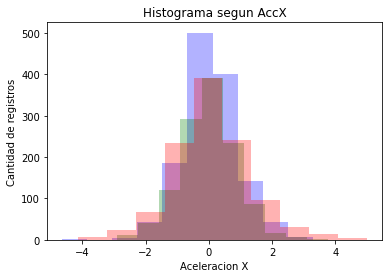

In [ ]:
# hacemos un histograma dividido por grupos en base a AccX
plt.title('Histograma segun AccX')
plt.xlabel('Aceleracion X')
plt.ylabel('Cantidad de registros')
plt.hist(t_trainSlow['AccX'], alpha=0.3, color='blue')
plt.hist(t_trainNormal['AccX'], alpha=0.3, color='green')
plt.hist(t_trainAggressive['AccX'], alpha=0.3, color='red')

plt.show()

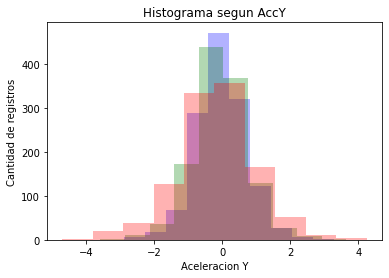

In [ ]:
# hacemos un histograma dividido por grupos en base a AccY
plt.title('Histograma segun AccY')
plt.xlabel('Aceleracion Y')
plt.ylabel('Cantidad de registros')
plt.hist(t_trainSlow['AccY'], alpha=0.3, color='blue')
plt.hist(t_trainNormal['AccY'], alpha=0.3, color='green')
plt.hist(t_trainAggressive['AccY'], alpha=0.3, color='red')

plt.show()

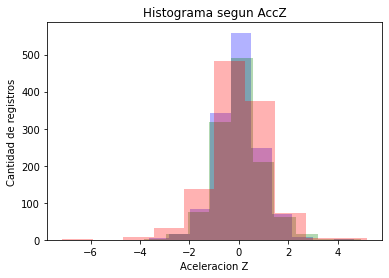

In [ ]:
# hacemos un histograma dividido por grupos en base a AccZ
plt.title('Histograma segun AccZ')
plt.xlabel('Aceleracion Z')
plt.ylabel('Cantidad de registros')
plt.hist(t_trainSlow['AccZ'], alpha=0.3, color='blue')
plt.hist(t_trainNormal['AccZ'], alpha=0.3, color='green')
plt.hist(t_trainAggressive['AccZ'], alpha=0.3, color='red')

plt.show()

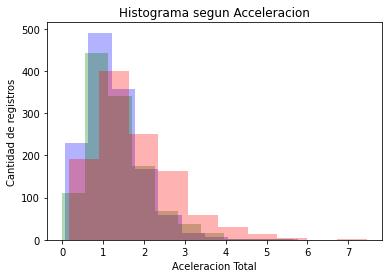

In [ ]:
# hacemos un histograma dividido por grupos en base a Aceleracion Total
plt.title('Histograma segun Acceleracion')
plt.xlabel('Aceleracion Total')
plt.ylabel('Cantidad de registros')
plt.hist(Sacc, alpha=0.3, color='blue')
plt.hist(Nacc, alpha=0.3, color='green')
plt.hist(Aacc, alpha=0.3, color='red')

plt.show()

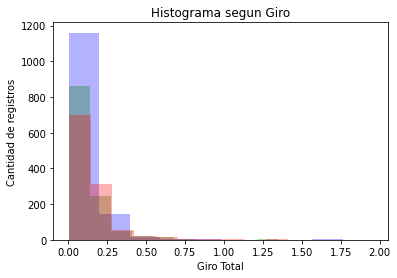

In [ ]:
# hacemos un histograma dividido por grupos en base a Aceleracion Total
plt.title('Histograma segun Giro')
plt.xlabel('Giro Total')
plt.ylabel('Cantidad de registros')
plt.hist(Sgcc, alpha=0.3, color='blue')
plt.hist(Ngcc, alpha=0.3, color='green')
plt.hist(Agcc, alpha=0.3, color='red')

plt.show()

# Muestreo y transformación de los datos para los modelos

In [ ]:
# Haremos un resúmen a grandes rasgos de la información de los conductores lentos
t_trainSlow.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000
mean,0.046646,-0.033454,0.009289,0.002450,-0.000246,0.003893,3583.812923
std,0.859006,0.736353,0.867061,0.068146,0.125422,0.102954,439.659744
min,-4.636523,-2.881108,-3.652553,-0.751822,-1.587028,-1.236468,2830.000000
25%,-0.482434,-0.494225,-0.523700,-0.027336,-0.048869,-0.026954,3190.000000
50%,0.003830,-0.035237,-0.000300,0.003818,-0.001833,0.002367,3607.000000
75%,0.539944,0.411848,0.501315,0.032834,0.047037,0.034743,3966.500000
max,3.278154,3.273867,4.664911,0.666607,1.679879,1.190500,4325.000000


In [ ]:
# Haremos un resúmen a grandes rasgos de la información de los conductores normales
t_trainNormal.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-0.017973,-0.027739,0.034425,0.001905,-0.000916,0.009527,647.986667
std,0.866247,0.814376,0.964496,0.060716,0.117546,0.113778,374.266718
min,-2.897342,-3.578845,-3.825483,-0.287565,-1.290758,-0.962189,1.000000
25%,-0.561982,-0.519837,-0.555840,-0.029169,-0.051465,-0.031230,324.500000
50%,-0.005193,-0.057561,0.006496,0.000153,-0.003054,0.003283,648.000000
75%,0.509171,0.466374,0.552031,0.032529,0.049022,0.041462,971.500000
max,3.756986,3.650834,4.954320,0.281762,0.692110,0.731129,1295.000000


In [ ]:
# Haremos un resúmen a grandes rasgos de la información de los conductores agresivos
t_trainAggressive.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.096086,-0.170461,-0.021144,0.000230,-0.002886,0.011099,2074.480683
std,1.218311,1.138666,1.129207,0.071682,0.135881,0.131061,347.157387
min,-4.132884,-4.699795,-7.143998,-0.558178,-1.290758,-0.829631,1474.000000
25%,-0.629725,-0.822552,-0.637329,-0.029169,-0.064752,-0.033063,1774.000000
50%,0.023777,-0.182746,0.008389,0.001985,-0.002443,0.002367,2075.000000
75%,0.766508,0.516303,0.626818,0.030085,0.058032,0.046960,2375.000000
max,4.985548,4.245151,5.171739,0.849255,1.255328,1.006019,2675.000000


In [ ]:
# Haremos un resúmen a grandes rasgos de la información de los datos de prueba
t_test.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,0.106234,-0.131791,0.045011,0.003192,0.001452,0.011472,819830.000324
std,0.968089,0.904398,0.997625,0.066636,0.120963,0.113535,525.760733
min,-4.854163,-7.621754,-6.106982,-0.514959,-1.309466,-0.976315,818922.000000
25%,-0.408916,-0.625868,-0.461438,-0.024435,-0.045739,-0.027031,819338.000000
50%,0.051892,-0.096929,0.054154,0.001222,-0.000993,0.002291,819832.500000
75%,0.579148,0.393118,0.575119,0.028100,0.043601,0.035888,820292.250000
max,5.864980,4.308813,5.564037,1.490511,1.707598,0.719447,820709.000000


In [ ]:
# Sumamos los cuadrado de todas las aceleraciones de los conductores lentos, y obtenermos sus raices
np.sqrt(sum(t_trainSlow['AccX']**2)),np.sqrt(sum(t_trainSlow['AccY']**2)),np.sqrt(sum(t_trainSlow['AccZ']**2))

(31.373425736006322, 26.881887512773126, 31.622793865095534)

In [ ]:
# Sumamos los cuadrado de todas las aceleraciones de los conductores normales, y obtenermos sus raices
np.sqrt(sum(t_trainNormal['AccX']**2)),np.sqrt(sum(t_trainNormal['AccY']**2)),np.sqrt(sum(t_trainNormal['AccZ']**2))

(30.001634609595904, 28.215422816556586, 33.41848948677573)

In [ ]:
# Sumamos los cuadrado de todas las aceleraciones de los conductores agresivos, y obtenermos sus raices
np.sqrt(sum(t_trainAggressive['AccX']**2)),np.sqrt(sum(t_trainAggressive['AccY']**2)),np.sqrt(sum(t_trainAggressive['AccZ']**2))

(40.75289487066118, 38.39421089636513, 37.6619078783764)

In [ ]:
# Sumamos los cuadrado de todos los giros de los conductores lentos, y obtenermos sus raices
np.sqrt(sum(t_trainSlow['GyroX']**2)),np.sqrt(sum(t_trainSlow['GyroY']**2)),np.sqrt(sum(t_trainSlow['GyroZ']**2))

(2.4868293562001225, 4.574047656407513, 3.757336369284352)

In [ ]:
# Sumamos los cuadrado de todos los giros de los conductores normales, y obtenermos sus raices
np.sqrt(sum(t_trainNormal['GyroX']**2)),np.sqrt(sum(t_trainNormal['GyroY']**2)),np.sqrt(sum(t_trainNormal['GyroZ']**2))

(2.1034120482627228, 4.070326278554628, 3.95353570554927)

In [ ]:
# Sumamos los cuadrado de todos los giros de los conductores agresivos, y obtenermos sus raices
np.sqrt(sum(t_trainAggressive['GyroX']**2)),np.sqrt(sum(t_trainAggressive['GyroY']**2)),np.sqrt(sum(t_trainAggressive['GyroZ']**2))

(2.390371273849556, 4.532211747707562, 4.38611917528358)

In [ ]:
# Eliminamos unos datos (hasta 49), nos quedamos con la cantidad maxima posible que sea multiplo de 50
k=50
t_trainSlow=t_trainSlow[:(len(t_trainSlow)//k)*k]
t_trainNormal=t_trainNormal[:(len(t_trainNormal)//k)*k]
t_trainAggressive=t_trainAggressive[:(len(t_trainAggressive)//k)*k]
t_test=t_test[:(len(t_test)//k)*k]

In [ ]:
# De los conductores lentos, agrupamos los datos en grupos de 50 registros comsecutivos
x=t_trainSlow
auxAccX=[]
auxAccY=[]
auxAccZ=[]
auxGyroX=[]
auxGyroY=[]
auxGyroZ=[]
for i in range(len(x)//k):
  auxAccX.append( np.sqrt(sum(x['AccX'][i*k:i*k+k]**2)) )
  auxAccY.append( np.sqrt(sum(x['AccY'][i*k:i*k+k]**2)) )
  auxAccZ.append( np.sqrt(sum(x['AccZ'][i*k:i*k+k]**2)) )
  auxGyroX.append(  np.sqrt(sum(x['GyroX'][i*k:i*k+k]**2)) )
  auxGyroY.append(  np.sqrt(sum(x['GyroY'][i*k:i*k+k]**2)) )
  auxGyroZ.append(  np.sqrt(sum(x['GyroZ'][i*k:i*k+k]**2)) )
aux={'AccX':auxAccX,'AccY':auxAccY,'AccZ':auxAccZ,'GyroX':auxGyroX,'GyroY':auxGyroY,'GyroZ':auxGyroZ,'Class':'SLOW'}

In [ ]:
# Creamos un DataFrame con lo antes generado
df_train = pd.DataFrame(data = aux ,columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Class'])

In [ ]:
# De los conductores normales, agrupamos los datos en grupos de 50 registros comsecutivos
x=t_trainNormal
auxAccX=[]
auxAccY=[]
auxAccZ=[]
auxGyroX=[]
auxGyroY=[]
auxGyroZ=[]
for i in range(len(x)//k):
  auxAccX.append( np.sqrt(sum(x['AccX'][i*k:i*k+k]**2)) )
  auxAccY.append( np.sqrt(sum(x['AccY'][i*k:i*k+k]**2)) )
  auxAccZ.append( np.sqrt(sum(x['AccZ'][i*k:i*k+k]**2)) )
  auxGyroX.append(  np.sqrt(sum(x['GyroX'][i*k:i*k+k]**2)) )
  auxGyroY.append(  np.sqrt(sum(x['GyroY'][i*k:i*k+k]**2)) )
  auxGyroZ.append(  np.sqrt(sum(x['GyroZ'][i*k:i*k+k]**2)) )
aux={'AccX':auxAccX,'AccY':auxAccY,'AccZ':auxAccZ,'GyroX':auxGyroX,'GyroY':auxGyroY,'GyroZ':auxGyroZ,'Class':'NORMAL'}

In [ ]:
# Agregamos al DataFrame lo antes generado
df_train=df_train.append(pd.DataFrame(data = aux ,columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Class']),ignore_index=True)

In [ ]:
# De los conductores agresivos, agrupamos los datos en grupos de 50 registros comsecutivos
x=t_trainAggressive
auxAccX=[]
auxAccY=[]
auxAccZ=[]
auxGyroX=[]
auxGyroY=[]
auxGyroZ=[]
for i in range(len(x)//k):
  auxAccX.append( np.sqrt(sum(x['AccX'][i*k:i*k+k]**2)) )
  auxAccY.append( np.sqrt(sum(x['AccY'][i*k:i*k+k]**2)) )
  auxAccZ.append( np.sqrt(sum(x['AccZ'][i*k:i*k+k]**2)) )
  auxGyroX.append(  np.sqrt(sum(x['GyroX'][i*k:i*k+k]**2)) )
  auxGyroY.append(  np.sqrt(sum(x['GyroY'][i*k:i*k+k]**2)) )
  auxGyroZ.append(  np.sqrt(sum(x['GyroZ'][i*k:i*k+k]**2)) )
aux={'AccX':auxAccX,'AccY':auxAccY,'AccZ':auxAccZ,'GyroX':auxGyroX,'GyroY':auxGyroY,'GyroZ':auxGyroZ,'Class':'AGGRESSIVE'}

In [ ]:
# Agregamos al DataFrame lo antes generado
df_train=df_train.append(pd.DataFrame(data = aux ,columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Class']),ignore_index=True)

In [ ]:
# De los datos de prueba, agrupamos los datos en grupos de 50 registros comsecutivos
x=t_test
auxAccX=[]
auxAccY=[]
auxAccZ=[]
auxGyroX=[]
auxGyroY=[]
auxGyroZ=[]
auxClass=[]
for i in range(len(x)//k):
  auxAccX.append( np.sqrt(sum(x['AccX'][i*k:i*k+k]**2)) )
  auxAccY.append( np.sqrt(sum(x['AccY'][i*k:i*k+k]**2)) )
  auxAccZ.append( np.sqrt(sum(x['AccZ'][i*k:i*k+k]**2)) )
  auxGyroX.append(  np.sqrt(sum(x['GyroX'][i*k:i*k+k]**2)) )
  auxGyroY.append(  np.sqrt(sum(x['GyroY'][i*k:i*k+k]**2)) )
  auxGyroZ.append(  np.sqrt(sum(x['GyroZ'][i*k:i*k+k]**2)) )
  auxClass.append( x.Class[i*k:i*k+k].mode()[0] )
aux={'AccX':auxAccX,'AccY':auxAccY,'AccZ':auxAccZ,'GyroX':auxGyroX,'GyroY':auxGyroY,'GyroZ':auxGyroZ,'Class':auxClass}

In [ ]:
# Creamos un DataFrame con lo antes generado
df_test = pd.DataFrame(data = aux ,columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Class'])

In [ ]:
# Cambiamos las clases por un valor numerico y buscamos la correlacion entre los datos
df_train.replace({'AGGRESSIVE':2,'NORMAL':1,'SLOW':0},inplace=True)
df_train.corr()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class
AccX,1.000000,0.597521,0.573540,0.409642,0.342465,0.335307,0.485729
AccY,0.597521,1.000000,0.571213,0.317401,0.432063,0.321418,0.711588
AccZ,0.573540,0.571213,1.000000,0.377149,0.332149,0.103004,0.474048
GyroX,0.409642,0.317401,0.377149,1.000000,0.584394,0.528049,0.138335
GyroY,0.342465,0.432063,0.332149,0.584394,1.000000,0.553886,0.278318
GyroZ,0.335307,0.321418,0.103004,0.528049,0.553886,1.000000,0.228765
Class,0.485729,0.711588,0.474048,0.138335,0.278318,0.228765,1.000000


In [ ]:
# Regresamos las clases a su estado original
df_train.replace({2:'AGGRESSIVE',1:'NORMAL',0:'SLOW'},inplace=True)

Aqui haremos notar que `AccY` es la variable independiente que más correlacion tiene con la clase, por esto mismo, y dado que `AccX` y `AccZ` estan medianamente correlacionadas a `AccY` haremos nuestro modelo en base a solo `AccY`

# Implementación de diferentes modelos

### Random Forest

Comenzaremos probando con `Random Forest`

In [ ]:
# Se hara un modelo predictorio utilizando Random Forest y se ajusta a los datos de entrenamiento en base a AccY
from sklearn.ensemble import RandomForestClassifier

X_train = df_train[['AccY']]
y_train = df_train['Class']

X_test = df_test[['AccY']]
y_test = df_test['Class']

clf = RandomForestClassifier(n_estimators=10,random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
# Alimentamos los datos de entrenamiento (agrupados) al predictor
ypred = clf.predict(X_test)
ypred

array(['AGGRESSIVE', 'NORMAL', 'SLOW', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'NORMAL', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'NORMAL', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'SLOW', 'NORMAL', 'NORMAL', 'NORMAL', 'SLOW', 'NORMAL', 'SLOW',
       'NORMAL', 'SLOW', 'AGGRESSIVE', 'SLOW', 'NORMAL', 'SLOW', 'NORMAL',
       'SLOW', 'AGGRESSIVE', 'NORMAL', 'SLOW', 'SLOW', 'AGGRESSIVE',
       'SLOW', 'SLOW', 'NORMAL', 'SLOW', 'NORMAL', 'SLOW', 'SLOW', 'SLOW',
       'SLOW', 'SLOW', 'SLOW', 'SLOW', 'NORMAL', 'SLOW', 'NORMAL', 'SLOW',
       'SLOW', 'SLOW'], dtype=object)

In [ ]:
# Creamos una funcion para determinara la presision de nuestro modelo
def accuracy(y,ypred):
  count=0
  for i in range(len(y)):
    if(y[i] == ypred[i]):
      count+=1
  return count/len(y)

In [ ]:
# Buscamos la presicion real utilizando los datos predecidos y los valores esperados
print('RAndom Forest -> AccY, Null RandomState')
print('Accuracy :', accuracy(y_test,ypred)*100)

RAndom Forest -> AccY, Null RandomState
Accuracy : 60.65573770491803


Ahora con esta base haremos más pruebas con distintas variables para determinar el mejor modelo utilizando `Random Forest`

Ahora utilizaremos todo el dataset

In [ ]:
# Se hara un modelo predictorio utilizando Random Forest y se ajusta a los datos de entrenamiento utilizando todas las variables
# Se utiliza un random_statte de 3
X_train = df_train[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
y_train = df_train['Class']

X_test = df_test[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
y_test = df_test['Class']

clf = RandomForestClassifier(n_estimators=10,random_state=3)
clf = clf.fit(X_train, y_train)

In [ ]:
# Alimentamos los datos de entrenamiento (agrupados) al predictor
ypred = clf.predict(X_test)
ypred

array(['AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'SLOW', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'NORMAL', 'SLOW', 'AGGRESSIVE', 'SLOW', 'NORMAL',
       'NORMAL', 'NORMAL', 'SLOW', 'NORMAL', 'NORMAL', 'NORMAL', 'SLOW',
       'NORMAL', 'SLOW', 'SLOW', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'AGGRESSIVE', 'NORMAL', 'AGGRESSIVE', 'SLOW', 'SLOW', 'SLOW',
       'SLOW', 'SLOW', 'SLOW', 'SLOW', 'SLOW', 'SLOW', 'SLOW', 'SLOW',
       'NORMAL', 'SLOW', 'SLOW', 'NORMAL', 'NORMAL'], dtype=object)

In [ ]:
# Buscamos la presicion real utilizando los datos predecidos y los valores esperados
print('RAndom Forest -> Hole DataSet, RandomState 3')
print('Accuracy :', accuracy(y_test,ypred)*100)

RAndom Forest -> Hole DataSet, RandomState 3
Accuracy : 68.85245901639344


In [ ]:
# Se hara un modelo predictorio utilizando Random Forest y se ajusta a los datos de entrenamiento utilizando todas las variables
# Se utiliza un random_statte nulo
X_train = df_train[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
y_train = df_train['Class']

X_test = df_test[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
y_test = df_test['Class']

clf = RandomForestClassifier(n_estimators=10,random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
# Alimentamos los datos de entrenamiento (agrupados) al predictor
ypred = clf.predict(X_test)
ypred

array(['AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'NORMAL',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'SLOW', 'NORMAL', 'SLOW', 'SLOW', 'NORMAL', 'AGGRESSIVE', 'SLOW',
       'NORMAL', 'AGGRESSIVE', 'AGGRESSIVE', 'NORMAL', 'SLOW', 'NORMAL',
       'SLOW', 'SLOW', 'NORMAL', 'SLOW', 'NORMAL', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'SLOW', 'NORMAL', 'SLOW', 'SLOW',
       'SLOW', 'NORMAL', 'SLOW', 'NORMAL', 'SLOW', 'SLOW', 'SLOW',
       'NORMAL', 'SLOW', 'SLOW', 'SLOW', 'SLOW'], dtype=object)

In [ ]:
# Buscamos la presicion real utilizando los datos predecidos y los valores esperados
print('RAndom Forest -> Hole DataSet, Null RandomState')
print('Accuracy :', accuracy(y_test,ypred)*100)

RAndom Forest -> Hole DataSet, Null RandomState
Accuracy : 60.65573770491803


### K-Nearest Neighbors
En esta seccion estaremos trabajando con `KNN` para predecir

In [ ]:
# Se hara un modelo predictorio utilizando KNN y se ajusta a los datos de entrenamiento en base a AccY y AccZ
from sklearn.neighbors import KNeighborsClassifier
X_train = df_train[['AccY','AccZ']]
y_train = df_train['Class']

X_test = df_test[['AccY','AccZ']]
y_test = df_test['Class']

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)

In [ ]:
# Alimentamos los datos de entrenamiento (agrupados) al predictor
ypred = clf.predict(X_test)
ypred

array(['AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'NORMAL',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'SLOW', 'AGGRESSIVE', 'NORMAL', 'SLOW',
       'NORMAL', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'NORMAL', 'NORMAL', 'SLOW', 'SLOW', 'SLOW', 'SLOW', 'NORMAL',
       'NORMAL', 'NORMAL', 'AGGRESSIVE', 'SLOW', 'NORMAL', 'AGGRESSIVE',
       'NORMAL', 'SLOW', 'AGGRESSIVE', 'AGGRESSIVE', 'SLOW', 'NORMAL',
       'NORMAL', 'AGGRESSIVE', 'SLOW', 'NORMAL', 'SLOW', 'SLOW', 'NORMAL',
       'SLOW', 'SLOW', 'SLOW', 'SLOW', 'NORMAL', 'SLOW', 'NORMAL', 'SLOW',
       'NORMAL', 'SLOW', 'SLOW'], dtype=object)

In [ ]:
# Buscamos la presicion real utilizando los datos predecidos y los valores esperados
print('KNN')
print('Accuracy :', accuracy(y_test,ypred)*100)

KNN
Accuracy : 57.377049180327866


### Decision Tree
En esta seccion estaremos trabajando con `Decision Tree` para predecir

In [ ]:
# Se hara un modelo predictorio utilizando Arboles de desicion y se ajusta a los datos de entrenamiento en base a todas las variables
from sklearn import tree

X_train = df_train[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
y_train = df_train['Class']

X_test = df_test[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
y_test = df_test['Class']


clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)

In [ ]:
# Alimentamos los datos de entrenamiento (agrupados) al predictor
ypred = clf.predict(X_test)
ypred

array(['SLOW', 'NORMAL', 'SLOW', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'SLOW', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'AGGRESSIVE', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'SLOW', 'AGGRESSIVE', 'AGGRESSIVE',
       'AGGRESSIVE', 'SLOW', 'NORMAL', 'NORMAL', 'SLOW', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'SLOW', 'AGGRESSIVE', 'SLOW',
       'NORMAL', 'SLOW', 'NORMAL', 'NORMAL', 'SLOW', 'AGGRESSIVE', 'SLOW',
       'SLOW', 'SLOW', 'SLOW', 'NORMAL', 'NORMAL', 'SLOW', 'SLOW', 'SLOW',
       'NORMAL', 'SLOW', 'SLOW', 'SLOW', 'SLOW', 'SLOW', 'NORMAL', 'SLOW',
       'SLOW', 'SLOW', 'SLOW', 'SLOW'], dtype=object)

In [ ]:
# Buscamos la presicion real utilizando los datos predecidos y los valores esperados
print('Decision Tree')
print('Accuracy :', accuracy(y_test,ypred)*100)

Decision Tree
Accuracy : 63.934426229508205


# Conclusiones finales y Selección del modelo